# Test `EIF_reboot` Code

In [3]:
import sys
sys.path.append('..')
from model_reboot.EIF_reboot import ExtendedTree, ExtendedIsolationForest
import numpy as np
from utils_reboot.datasets import Dataset

In [4]:
dataset = Dataset("wine", path = "../data/real/")
dataset.drop_duplicates()

In [6]:
dataset.shape

(129, 13)

In [7]:
I=ExtendedIsolationForest(True, n_estimators=100)

In [8]:
I.fit(dataset.X)
gfi=I.global_importances(dataset.X,0.1)
lfi=I.local_importances(dataset.X)
gfi.shape,lfi.shape

100it [00:02, 44.48it/s]
100it [00:00, 10956.05it/s]


((13,), (129, 13))

# Test time

In [ ]:
import tqdm
dataset = Dataset("wine", path = "../data/real/")
dataset.drop_duplicates()
I=ExtendedIsolationForest(True,n_estimators=200)
for _ in tqdm.tqdm(range(10)):
    I.fit(dataset.X)
    I.predict(dataset.X)


## Test GFI

In [1]:
import sys
import os
sys.path.append('..')

In [2]:
from utils_reboot.experiments import *
from utils_reboot.datasets import *
from utils_reboot.plots import *

from model_reboot.EIF_reboot import ExtendedIsolationForest

In [3]:

cwd = '/Users/alessio/Documents/ExIFFI'


In [4]:
dataset = Dataset("wine", path = "../data/real/")
dataset.drop_duplicates()

I=ExtendedIsolationForest(True, n_estimators=200)

In [5]:

path_experiments = cwd +"/experiments/results"

In [6]:
_,_,path,path2 = compute_global_importances(I, dataset, 20, p=0.1, pwd_imp_score=path_experiments,pwd_plt_data=path_experiments)

  0%|          | 0/20 [00:00<?, ?it/s]

200it [00:14, 13.56it/s]
200it [00:00, 4250.71it/s]29<09:18, 29.40s/it]
200it [00:00, 3769.81it/s]32<04:05, 13.66s/it]
200it [00:00, 4839.12it/s]33<02:17,  8.10s/it]
200it [00:00, 2906.78it/s]35<01:28,  5.52s/it]
200it [00:00, 4035.84it/s]36<01:00,  4.06s/it]
200it [00:00, 2359.72it/s]38<00:47,  3.42s/it]
200it [00:00, 5069.44it/s]40<00:39,  3.04s/it]
200it [00:00, 3128.62it/s]42<00:31,  2.62s/it]
200it [00:00, 2605.01it/s]44<00:24,  2.26s/it]
200it [00:00, 1735.71it/s]:46<00:21,  2.16s/it]
200it [00:00, 4781.82it/s]:47<00:17,  1.99s/it]
200it [00:00, 5060.76it/s]:49<00:15,  1.91s/it]
200it [00:00, 5354.62it/s]:51<00:13,  1.93s/it]
200it [00:00, 3510.11it/s]:53<00:11,  1.90s/it]
200it [00:00, 4930.10it/s]:54<00:08,  1.80s/it]
200it [00:00, 4975.24it/s]:56<00:06,  1.70s/it]
200it [00:00, 4594.74it/s]:58<00:05,  1.79s/it]
200it [00:00, 3664.08it/s]:59<00:03,  1.70s/it]
200it [00:00, 3352.04it/s]:01<00:01,  1.60s/it]
100%|██████████| 20/20 [01:02<00:00,  3.13s/it]


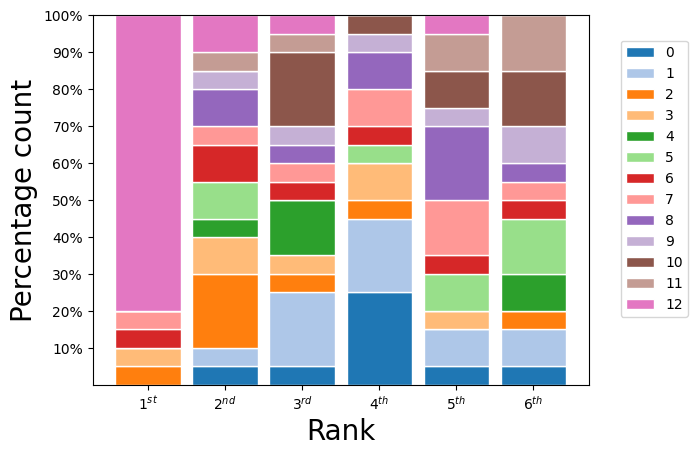

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Rank', ylabel='Percentage count'>,
       0     1     2     3     4     5     6     7     8     9     10    11  \
 0    0.0   0.0   5.0   5.0   0.0   0.0   5.0   5.0   0.0   0.0   0.0   0.0   
 1    5.0   5.0  20.0  10.0   5.0  10.0  10.0   5.0  10.0   5.0   0.0   5.0   
 2    5.0  20.0   5.0   5.0  15.0   0.0   5.0   5.0   5.0   5.0  20.0   5.0   
 3   25.0  20.0   5.0  10.0   0.0   5.0   5.0  10.0  10.0   5.0   5.0   0.0   
 4    5.0  10.0   0.0   5.0   0.0  10.0   5.0  15.0  20.0   5.0  10.0  10.0   
 5    5.0  10.0   5.0   0.0  10.0  15.0   5.0   5.0   5.0  10.0  15.0  15.0   
 6    0.0  10.0  10.0   5.0   5.0   0.0  15.0  20.0  10.0  20.0   5.0   0.0   
 7    5.0   5.0   0.0   5.0  20.0  15.0  10.0  10.0   5.0   0.0   5.0  20.0   
 8   10.0   5.0  20.0   5.0   5.0  15.0   5.0  10.0   0.0  10.0  10.0   5.0   
 9   10.0   0.0  10.0   5.0  10.0  10.0   0.0   5.0  10.0  25.0   5.0  10.0   
 10  10.0   0.0   5.0  20.0  10.0   5

In [7]:
bar_plot(dataset, path, path_experiments)

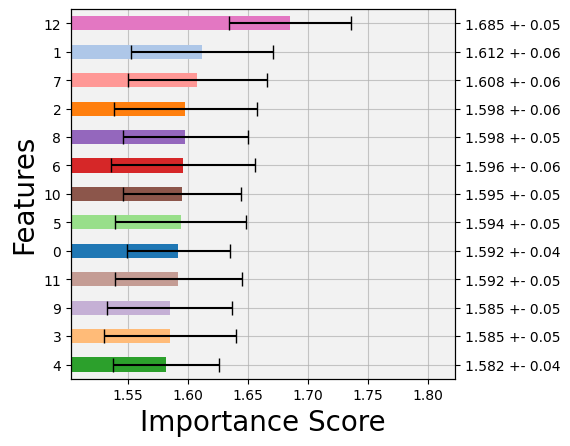

(<AxesSubplot: xlabel='Importance Score', ylabel='Features'>, <AxesSubplot: >)

In [8]:
score_plot(dataset, path2, path_experiments)